# Which areas of Paris are the best to start a fast food restaurant

### 1. Import Libraries

In [20]:
import pandas as pd
import numpy as np
import folium

from sklearn.cluster import KMeans

from geopy.geocoders import Nominatim
import requests 

import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

### 2. Import Data

Paris metro is the fastest and easiest way to travel in the city. I downloaded the list of metro stations with their annual traffics as we can assume that being close to public transport would be better for restaurants. The dataset comes from the RATP (state-owned public transport operator and maintainer).

In [21]:
traffic = pd.read_csv('trafic-annuel-entrant-par-station-du-reseau-ferre-2019.csv', 
                     error_bad_lines=False, 
                     index_col =False, 
                     sep=';'
                    )
traffic.head()

,Rang,Réseau,Station,Trafic,Correspondance_1,Correspondance_2,Correspondance_3,Correspondance_4,Correspondance_5,Ville,Arrondissement pour Paris
0,1,Métro,GARE DU NORD,51141374,4,5,NaN,NaN,NaN,Paris,10.0
1,2,Métro,SAINT-LAZARE,46923920,3,9,12,13.0,14.0,Paris,8.0
2,3,Métro,GARE DE LYON,36512570,1,14,A,NaN,NaN,Paris,12.0
3,8,Métro,LA DEFENSE,16213921,1,NaN,NaN,NaN,NaN,Puteaux,NaN
4,13,Métro,BELLEVILLE,10735544,2,11,NaN,NaN,NaN,Paris,10.0


We will remove RER stations which belong to another transport network.

In [22]:
traffic=traffic[traffic['Réseau']== "Métro"]

In [23]:
traffic.shape

(303, 11)

We can see that there are 303 metro stations in Paris. Now let's import the coordinates for all metro stations.

In [24]:
position=pd.read_csv('positions-geographiques-des-stations-du-reseau-ratp.csv', 
                     error_bad_lines=False, 
                     index_col =False, 
                     sep=';'
                    )
position.columns=['Id','Station','Description','Coordinates']
position.head()

,Id,Station,Description,Coordinates
0,3677677,RUE DE LA FERME,ROND-POINT MARTIN LUTHER KING - 77258,"48.8359484574,2.62990289517"
1,3677688,COLLEGE LE LUZARD,COURS DES ROCHES - 77337,"48.8467902961,2.61369101"
2,3678812,ZONE TECHNIQUE,ROUTE DES ANNIVERSAIRES - 95527,"49.0119496186,2.5332905562"
3,3678816,ENTRETIEN NORD,ROUTE DE L'ARPENTEUR - 95527,"49.0114652199,2.51552950645"
4,3682876,AVRON,63 BOULEVARD ALSACE-LORRAINE - 94058,"48.8500655011,2.49939528589"


We can now merge the traffic dataset with the coordinates dataset.

In [25]:
metro_df = position.merge(traffic,on='Station')
metro_df = metro_df.drop_duplicates(subset=['Station']).reset_index()
metro_df.head()

,index,Id,Station,Description,Coordinates,Rang,Réseau,Trafic,Correspondance_1,Correspondance_2,Correspondance_3,Correspondance_4,Correspondance_5,Ville,Arrondissement pour Paris
0,0,3682876,AVRON,63 BOULEVARD ALSACE-LORRAINE - 94058,"48.8500655011,2.49939528589",256,Métro,1871024,2,NaN,NaN,NaN,NaN,Paris,11.0
1,10,3685734,CHATEAU DE VINCENNES,PISTE GARE ROUTIERE - 75112,"48.8442170813,2.44079723454",50,Métro,6353285,1,NaN,NaN,NaN,NaN,Vincennes,NaN
2,43,3686299,ECOLE VETERINAIRE DE MAISONS-ALFORT,31-35 AVENUE DU GENERAL LECLERC - 94046,"48.8147969334,2.42270643461",157,Métro,3193857,8,NaN,NaN,NaN,NaN,Maisons -Alfort,NaN
3,58,7266017,MARX DORMOY,AVENUE FRANCOIS MITTERRAND - 91027,"48.7036035904,2.37143564263",151,Métro,3359946,12,NaN,NaN,NaN,NaN,Paris,18.0
4,67,7275132,SIMPLON,46 BOULEVARD ORNANO - 75118,"48.8948064764,2.34715016514",218,Métro,2366858,4,NaN,NaN,NaN,NaN,Paris,18.0


Text(0.5, 1.0, 'Traffic Distribution')

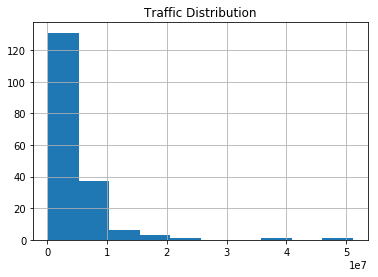

In [26]:
metro_df['Trafic'].hist()
plt.title("Traffic Distribution")

In [27]:
metro_df['Traffic_Cat']=pd.cut(metro_df['Trafic'],[0,2500000,5000000,7500000,10000000,55000000])

In [28]:
metro_df.head()

,index,Id,Station,Description,Coordinates,Rang,Réseau,Trafic,Correspondance_1,Correspondance_2,Correspondance_3,Correspondance_4,Correspondance_5,Ville,Arrondissement pour Paris,Traffic_Cat
0,0,3682876,AVRON,63 BOULEVARD ALSACE-LORRAINE - 94058,"48.8500655011,2.49939528589",256,Métro,1871024,2,NaN,NaN,NaN,NaN,Paris,11.0,"(0, 2500000]"
1,10,3685734,CHATEAU DE VINCENNES,PISTE GARE ROUTIERE - 75112,"48.8442170813,2.44079723454",50,Métro,6353285,1,NaN,NaN,NaN,NaN,Vincennes,NaN,"(5000000, 7500000]"
2,43,3686299,ECOLE VETERINAIRE DE MAISONS-ALFORT,31-35 AVENUE DU GENERAL LECLERC - 94046,"48.8147969334,2.42270643461",157,Métro,3193857,8,NaN,NaN,NaN,NaN,Maisons -Alfort,NaN,"(2500000, 5000000]"
3,58,7266017,MARX DORMOY,AVENUE FRANCOIS MITTERRAND - 91027,"48.7036035904,2.37143564263",151,Métro,3359946,12,NaN,NaN,NaN,NaN,Paris,18.0,"(2500000, 5000000]"
4,67,7275132,SIMPLON,46 BOULEVARD ORNANO - 75118,"48.8948064764,2.34715016514",218,Métro,2366858,4,NaN,NaN,NaN,NaN,Paris,18.0,"(0, 2500000]"


We are going to create a latitude and longitude columns

In [29]:
#get the coordinates
length=len(metro_df['Coordinates'])
Latitude=[]
Longitude=[]
for i in range(0,length):
    Latitude.append(metro_df.Coordinates.iloc[i].split(',')[0])
    Longitude.append(metro_df.Coordinates.iloc[i].split(',')[1])
    
metro_df['Latitude']=Latitude
metro_df['Longitude']=Longitude

In [30]:
metro_df.head()

,index,Id,Station,Description,Coordinates,Rang,Réseau,Trafic,Correspondance_1,Correspondance_2,Correspondance_3,Correspondance_4,Correspondance_5,Ville,Arrondissement pour Paris,Traffic_Cat,Latitude,Longitude
0,0,3682876,AVRON,63 BOULEVARD ALSACE-LORRAINE - 94058,"48.8500655011,2.49939528589",256,Métro,1871024,2,NaN,NaN,NaN,NaN,Paris,11.0,"(0, 2500000]",48.8500655011,2.49939528589
1,10,3685734,CHATEAU DE VINCENNES,PISTE GARE ROUTIERE - 75112,"48.8442170813,2.44079723454",50,Métro,6353285,1,NaN,NaN,NaN,NaN,Vincennes,NaN,"(5000000, 7500000]",48.8442170813,2.44079723454
2,43,3686299,ECOLE VETERINAIRE DE MAISONS-ALFORT,31-35 AVENUE DU GENERAL LECLERC - 94046,"48.8147969334,2.42270643461",157,Métro,3193857,8,NaN,NaN,NaN,NaN,Maisons -Alfort,NaN,"(2500000, 5000000]",48.8147969334,2.42270643461
3,58,7266017,MARX DORMOY,AVENUE FRANCOIS MITTERRAND - 91027,"48.7036035904,2.37143564263",151,Métro,3359946,12,NaN,NaN,NaN,NaN,Paris,18.0,"(2500000, 5000000]",48.7036035904,2.37143564263
4,67,7275132,SIMPLON,46 BOULEVARD ORNANO - 75118,"48.8948064764,2.34715016514",218,Métro,2366858,4,NaN,NaN,NaN,NaN,Paris,18.0,"(0, 2500000]",48.8948064764,2.34715016514


In [71]:
metro_df['Traffic_Cat'].value_counts()

(2500000, 5000000]      77
(0, 2500000]            52
(5000000, 7500000]      31
(10000000, 55000000]    12
(7500000, 10000000]      8
Name: Traffic_Cat, dtype: int64

In [31]:
Traffic = pd.get_dummies(metro_df['Traffic_Cat'], prefix_sep="__",columns=['Traffic_Cat'])
Traffic=pd.concat([metro_df['Station'],Traffic],axis=1)
Traffic.rename(columns={'Station':'Neighborhood'},inplace=True)
Traffic.head()

,Neighborhood,"(0, 2500000]","(2500000, 5000000]","(5000000, 7500000]","(7500000, 10000000]","(10000000, 55000000]"
0,AVRON,1,0,0,0,0
1,CHATEAU DE VINCENNES,0,0,1,0,0
2,ECOLE VETERINAIRE DE MAISONS-ALFORT,0,1,0,0,0
3,MARX DORMOY,0,1,0,0,0
4,SIMPLON,1,0,0,0,0


In [115]:
traffic.shape

(303, 11)

### Data Exploration

Display Data on a map

In [13]:
#Display a map of Paris with neighborhood located with blue markers
latitude=48.8566
longitude=2.3522
map_paris = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng, station in zip(metro_df['Latitude'], metro_df['Longitude'], metro_df['Station']):
    label = '{}'.format(station)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris) 
map_paris

Let's get the venues around each metro station.

In [14]:
#CLIENT_ID = '5K0PHFW42REOWNBKVD4TEK5RXZCSO0MGZW3M5STEVCU1HAWH'
#CLIENT_SECRET = 'TTQY3H3MUP4V00FY3DN23VZ1AVNHWAMXJJYRRXIVVVIQIX3E' 
#VERSION = '20180605'

#claudine
#CLIENT_ID = '5K0PHFW42REOWNBKVD4TEK5RXZCSO0MGZW3M5STEVCU1HAWH'
#CLIENT_SECRET = 'TTQY3H3MUP4V00FY3DN23VZ1AVNHWAMXJJYRRXIVVVIQIX3E' 
#VERSION = '20180605'

#
CLIENT_ID = 'D1FFIR15EUTWZ4GWKHKWZQ152Z04J210PPKWWEHRUQL2C2X2'
CLIENT_SECRET = 'UHUBX5GWOMEEABUAVJPRAJCSJ3HX1ZTQ5DYAKAZD00G5VASK'
VERSION = '20180605'

In [ ]:
# Set the number of venues (100) and the radius (500 meters)

LIMIT= 100
radius = 500

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=radius):
    venues_list=[]
    nearby_venues=pd.DataFrame()
    for name, lat, lng in zip(names, latitudes, longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request

            
        results = requests.get(url).json()["response"]['groups'][0]['items']

            # return only relevant information for each nearby venue
        venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])

        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Neighborhood', 
                          'Neighborhood Latitude', 
                          'Neighborhood Longitude', 
                          'Venue', 
                          'Venue Latitude', 
                          'Venue Longitude', 
                          'Venue Category']
    return(nearby_venues)

In [19]:
Paris_venues = getNearbyVenues(names=metro_df['Station'],
                                   latitudes=metro_df['Latitude'],
                                   longitudes=metro_df['Longitude']
                                  )

In [34]:
Paris_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,AVRON,48.850066,2.499395,Monceau Fleurs,48.849502,2.498391,Flower Shop
1,AVRON,48.850066,2.499395,Pourquoi Pas?,48.849589,2.498961,French Restaurant
2,AVRON,48.850066,2.499395,Onela Perreux-sur-Marne,48.849233,2.496895,Home Service
3,AVRON,48.850066,2.499395,Arrêt Raymond Poincarré [116],48.850198,2.494422,Bus Stop
4,AVRON,48.850066,2.499395,Mille Et Un Vin,48.848123,2.494047,Wine Shop


In [75]:
Paris_venues = Paris_venues[Paris_venues['Venue Category']!='French Restaurant']
Paris_venues = Paris_venues[Paris_venues['Venue Category']!='Hotel']

In [77]:
Paris_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,AVRON,48.850066,2.499395,Monceau Fleurs,48.849502,2.498391,Flower Shop
2,AVRON,48.850066,2.499395,Onela Perreux-sur-Marne,48.849233,2.496895,Home Service
3,AVRON,48.850066,2.499395,Arrêt Raymond Poincarré [116],48.850198,2.494422,Bus Stop
4,AVRON,48.850066,2.499395,Mille Et Un Vin,48.848123,2.494047,Wine Shop
5,CHATEAU DE VINCENNES,48.844217,2.440797,Tamarin,48.845311,2.438471,Thai Restaurant


Let's now find out where the locations are reularly answered when it has become a regular answer for the fles

In [36]:
Fast_Food=Paris_venues[Paris_venues['Venue Category']=='Fast Food Restaurant']
Fast_Food.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
213,BALARD,48.836455,2.278248,McDonald's,48.833495,2.277399,Fast Food Restaurant
245,LES SABLONS,48.881047,2.271561,McDonald's,48.881292,2.271762,Fast Food Restaurant
359,MAIRIE DES LILAS,48.879404,2.415305,McDonald's,48.879888,2.416462,Fast Food Restaurant
570,LA FOURCHE,48.908038,2.496155,McDonald's,48.907345,2.489682,Fast Food Restaurant
837,VOLTAIRE,48.877961,2.239545,McDonald's,48.881725,2.239097,Fast Food Restaurant


In [26]:
Fast_Food['Neighborhood'].value_counts()

PORTE DE PANTIN             2
ETIENNE MARCEL              2
PORTE DE CLICHY             2
BASILIQUE DE SAINT-DENIS    2
MAIRIE DE SAINT-OUEN        1
PORTE DOREE                 1
MAIRIE DES LILAS            1
CRETEIL-PREFECTURE          1
LA FOURCHE                  1
VOLTAIRE                    1
CHATEAU D'EAU               1
MICHEL BIZOT                1
PORTE DE LA VILLETTE        1
PICPUS                      1
LES SABLONS                 1
PORTE DE VANVES             1
PORTE DE VERSAILLES         1
GALLIENI                    1
PORTE DE BAGNOLET           1
BOTZARIS                    1
BALARD                      1
MARAICHERS                  1
RIQUET                      1
LES COURTILLES              1
PELLEPORT                   1
BERCY                       1
Name: Neighborhood, dtype: int64

In [38]:
# one hot encoding
Paris_onehot = pd.get_dummies(Paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Paris_onehot['Neighborhood'] = Paris_venues['Neighborhood'] 

#merge traffic data set

# move neighborhood column to the first column
fixed_columns = [Paris_onehot.columns[-1]] + list(Paris_onehot.columns[:-1])
Paris_onehot = Paris_onehot[fixed_columns]

Paris_onehot.head()

,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,Alsatian Restaurant,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,...,Vietnamese Restaurant,Water Park,Waterfall,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,AVRON,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AVRON,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AVRON,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AVRON,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,CHATEAU DE VINCENNES,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
Paris_venues.groupby('Neighborhood').count()
print('There are {} uniques categories.'.format(len(Paris_venues['Venue Category'].unique())))

There are 319 uniques categories.


In [18]:
Paris_grouped = Paris_onehot.groupby('Neighborhood').mean().reset_index()

Paris_grouped.head()

,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,Alsatian Restaurant,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,...,Vietnamese Restaurant,Water Park,Waterfall,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,ABBESSES,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.027027,0.0,0.0,0.0,0.0,0.0,0.0
1,ALEXANDRE DUMAS,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,ANATOLE FRANCE,0.0,0.0,0.0,0.0,0.054054,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,ARGENTINE,0.0,0.0,0.0,0.0,0.028571,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,ARTS ET METIERS,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.023256,0.023256,...,0.069767,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
Paris_grouped_traffic = Traffic.merge(Paris_grouped,on='Neighborhood')
Paris_grouped_traffic.head()

,Neighborhood,"(0, 2500000]","(2500000, 5000000]","(5000000, 7500000]","(7500000, 10000000]","(10000000, 55000000]",Accessories Store,Afghan Restaurant,African Restaurant,Alsatian Restaurant,...,Vietnamese Restaurant,Water Park,Waterfall,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,AVRON,1,0,0,0,0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.25,0.0,0.0,0.0,0.0,0.0
1,CHATEAU DE VINCENNES,0,0,1,0,0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
2,ECOLE VETERINAIRE DE MAISONS-ALFORT,0,1,0,0,0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
3,MARX DORMOY,0,1,0,0,0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
4,SIMPLON,1,0,0,0,0,0.0,0.0,0.023256,0.0,...,0.023256,0.0,0.0,0.023256,0.00,0.0,0.0,0.0,0.0,0.0


We create a dataframe with the top 10 common venues per neighborhood.

In [41]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [42]:
num_top_venues = 100

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Paris_grouped['Neighborhood']

for ind in np.arange(Paris_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Paris_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,91th Most Common Venue,92th Most Common Venue,93th Most Common Venue,94th Most Common Venue,95th Most Common Venue,96th Most Common Venue,97th Most Common Venue,98th Most Common Venue,99th Most Common Venue,100th Most Common Venue
0,ABBESSES,Bakery,Italian Restaurant,Plaza,Bar,Chinese Restaurant,Bistro,Mediterranean Restaurant,Basketball Court,Theater,...,Fried Chicken Joint,Zoo Exhibit,Cosmetics Shop,Bagel Shop,Basketball Stadium,Basque Restaurant,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store
1,ALEXANDRE DUMAS,Bakery,Italian Restaurant,Tennis Court,Soccer Stadium,Zoo Exhibit,Farmers Market,English Restaurant,Ethiopian Restaurant,Event Service,...,Beer Garden,Beer Store,Bistro,Bank,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym
2,ANATOLE FRANCE,Bistro,Supermarket,Thai Restaurant,Pizza Place,Bakery,Japanese Restaurant,American Restaurant,Farmers Market,Café,...,Boat or Ferry,Basketball Stadium,Basque Restaurant,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bookstore,Convention Center
3,ARGENTINE,Italian Restaurant,Steakhouse,Plaza,Bistro,Bagel Shop,Massage Studio,Gym / Fitness Center,Cocktail Bar,Lebanese Restaurant,...,Convenience Store,Cultural Center,Basque Restaurant,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Boat or Ferry,Bookstore,Botanical Garden
4,ARTS ET METIERS,Vietnamese Restaurant,Italian Restaurant,Chinese Restaurant,Restaurant,Coffee Shop,Bakery,Cocktail Bar,Bar,Steakhouse,...,Garden Center,Gas Station,Gastropub,Food Truck,Comfort Food Restaurant,Cultural Center,Brewery,Basketball Stadium,Basque Restaurant,Bed & Breakfast


In [43]:
neighborhoods_venues_sorted.shape

(179, 101)

# Clustering

I will use the Kmean algorithm to creat clusters based on the venues and the metro annual traffic.

In [44]:
Paris_grouped_clustering = Paris_grouped_traffic.drop('Neighborhood', 1)
Paris_grouped_clustering.head()

,"(0, 2500000]","(2500000, 5000000]","(5000000, 7500000]","(7500000, 10000000]","(10000000, 55000000]",Accessories Store,Afghan Restaurant,African Restaurant,Alsatian Restaurant,American Restaurant,...,Vietnamese Restaurant,Water Park,Waterfall,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,1,0,0,0,0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.25,0.0,0.0,0.0,0.0,0.0
1,0,0,1,0,0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
2,0,1,0,0,0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
4,1,0,0,0,0,0.0,0.0,0.023256,0.0,0.023256,...,0.023256,0.0,0.0,0.023256,0.00,0.0,0.0,0.0,0.0,0.0


In [45]:
Paris_grouped_clustering.shape

(179, 324)

In [46]:
# Determine the best K using the Silhouette Method using the euclidian distance as metric
from sklearn.metrics import silhouette_score
K_max=Paris_grouped_clustering.shape[0]-1
Ks=[]
silouhette=[]

for k in range(2, K_max+1):
    kmeans = KMeans(n_clusters = k).fit(Paris_grouped_clustering)
    labels = kmeans.labels_
    Ks.append(k)
    sil=silhouette_score(Paris_grouped_clustering, labels, metric = 'euclidean')
    silouhette.append(sil)
    if sil == max( silouhette):
        kclusters = k

print('Best number of clusters: ', kclusters)

Best number of clusters:  5


Text(0.5, 1.0, 'Silouhette Method for Optimal k')

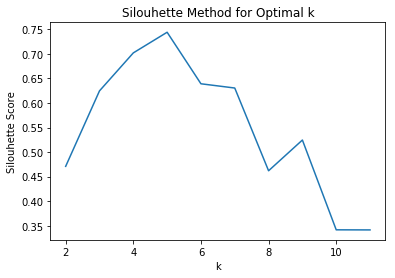

In [81]:
plt.plot(Ks[0:10],silouhette[0:10])
plt.xlabel('k')
plt.ylabel('Silouhette Score')
plt.title('Silouhette Method for Optimal k')

In [47]:
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Paris_grouped_clustering)

In [39]:
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 2, 0, 0, 1, 3, 1, 2, 3, 2])

In [48]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [51]:
Paris_merged = metro_df
Paris_merged.rename(columns={'Station':'Neighborhood'},inplace=True)
Paris_merged.head()

,index,Id,Neighborhood,Description,Coordinates,Rang,Réseau,Trafic,Correspondance_1,Correspondance_2,Correspondance_3,Correspondance_4,Correspondance_5,Ville,Arrondissement pour Paris,Traffic_Cat,Latitude,Longitude
0,0,3682876,AVRON,63 BOULEVARD ALSACE-LORRAINE - 94058,"48.8500655011,2.49939528589",256,Métro,1871024,2,NaN,NaN,NaN,NaN,Paris,11.0,"(0, 2500000]",48.8500655011,2.49939528589
1,10,3685734,CHATEAU DE VINCENNES,PISTE GARE ROUTIERE - 75112,"48.8442170813,2.44079723454",50,Métro,6353285,1,NaN,NaN,NaN,NaN,Vincennes,NaN,"(5000000, 7500000]",48.8442170813,2.44079723454
2,43,3686299,ECOLE VETERINAIRE DE MAISONS-ALFORT,31-35 AVENUE DU GENERAL LECLERC - 94046,"48.8147969334,2.42270643461",157,Métro,3193857,8,NaN,NaN,NaN,NaN,Maisons -Alfort,NaN,"(2500000, 5000000]",48.8147969334,2.42270643461
3,58,7266017,MARX DORMOY,AVENUE FRANCOIS MITTERRAND - 91027,"48.7036035904,2.37143564263",151,Métro,3359946,12,NaN,NaN,NaN,NaN,Paris,18.0,"(2500000, 5000000]",48.7036035904,2.37143564263
4,67,7275132,SIMPLON,46 BOULEVARD ORNANO - 75118,"48.8948064764,2.34715016514",218,Métro,2366858,4,NaN,NaN,NaN,NaN,Paris,18.0,"(0, 2500000]",48.8948064764,2.34715016514


In [52]:
# merge Paris_grouped with Paris data to add latitude/longitude for each neighborhood
Paris_merged = Paris_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood', how='left')
#Paris_merged.dropna(subset=['Cluster Labels'],inplace=True)
Paris_merged.head()

,index,Id,Neighborhood,Description,Coordinates,Rang,Réseau,Trafic,Correspondance_1,Correspondance_2,...,91th Most Common Venue,92th Most Common Venue,93th Most Common Venue,94th Most Common Venue,95th Most Common Venue,96th Most Common Venue,97th Most Common Venue,98th Most Common Venue,99th Most Common Venue,100th Most Common Venue
0,0,3682876,AVRON,63 BOULEVARD ALSACE-LORRAINE - 94058,"48.8500655011,2.49939528589",256,Métro,1871024,2,NaN,...,Beer Garden,Bike Rental / Bike Share,Bakery,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym
1,10,3685734,CHATEAU DE VINCENNES,PISTE GARE ROUTIERE - 75112,"48.8442170813,2.44079723454",50,Métro,6353285,1,NaN,...,Bank,Basketball Court,Basketball Stadium,Basque Restaurant,Bed & Breakfast,Beer Bar,Beer Garden,Bike Rental / Bike Share,Convention Center,Bistro
2,43,3686299,ECOLE VETERINAIRE DE MAISONS-ALFORT,31-35 AVENUE DU GENERAL LECLERC - 94046,"48.8147969334,2.42270643461",157,Métro,3193857,8,NaN,...,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bakery,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley
3,58,7266017,MARX DORMOY,AVENUE FRANCOIS MITTERRAND - 91027,"48.7036035904,2.37143564263",151,Métro,3359946,12,NaN,...,Beer Garden,Bike Rental / Bike Share,Bakery,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym
4,67,7275132,SIMPLON,46 BOULEVARD ORNANO - 75118,"48.8948064764,2.34715016514",218,Métro,2366858,4,NaN,...,Garden Center,Gas Station,Cosmetics Shop,Zoo Exhibit,Convention Center,Brewery,Basketball Stadium,Basque Restaurant,Bed & Breakfast,Beer Bar


In [53]:
Paris_merged.dropna(subset=['Cluster Labels'],inplace=True)
Paris_merged['Cluster Labels'].unique()

array([2., 1., 0., 3., 4.])

Visualisation of the resulting clusters

In [54]:
# create map
latitude=48.8566
longitude=2.3522
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

In [45]:
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Paris_merged['Latitude'],Paris_merged['Longitude'], Paris_merged['Neighborhood'], Paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Markers color: 
Cluster 0: red, 
CLuster 1: purple, 
Cluster 2: blue, 
Cluster 3: green, 
Cluster 4: orange.

In [55]:
Paris_merged.to_csv(r'C:\Users\veron\OneDrive\Documents\IBM datascience professional certificate\Capstone project\Paris\Venues\Results.csv')

# Cluster Exploration

In [56]:
Cluster_0=Paris_merged[Paris_merged['Cluster Labels']==0]
Cluster_1=Paris_merged[Paris_merged['Cluster Labels']==1]
Cluster_2=Paris_merged[Paris_merged['Cluster Labels']==2]
Cluster_3=Paris_merged[Paris_merged['Cluster Labels']==3]
Cluster_4=Paris_merged[Paris_merged['Cluster Labels']==4]

In [57]:
print( 'Number of metro stations in cluster 0: ', Cluster_0.shape[0])
print( 'Number of metro stations in cluster 1: ', Cluster_1.shape[0])
print( 'Number of metro stations in cluster 2: ', Cluster_2.shape[0])
print( 'Number of metro stations in cluster 3: ', Cluster_3.shape[0])
print( 'Number of metro stations in cluster 4: ', Cluster_4.shape[0])

Number of metro stations in cluster 0:  77
Number of metro stations in cluster 1:  51
Number of metro stations in cluster 2:  31
Number of metro stations in cluster 3:  12
Number of metro stations in cluster 4:  8


Cluster Labels
0.0    77
1.0    51
2.0    31
3.0    12
4.0     8
Name: index, dtype: int64

In [58]:
pd.DataFrame(Cluster_0.groupby('Traffic_Cat').count()['index'])

,index
Traffic_Cat,
"(0, 2500000]",20
"(2500000, 5000000]",37
"(5000000, 7500000]",15
"(7500000, 10000000]",0
"(10000000, 55000000]",5


In [59]:
pd.DataFrame(Cluster_1.groupby('Traffic_Cat').count()['index'])

,index
Traffic_Cat,
"(0, 2500000]",16
"(2500000, 5000000]",17
"(5000000, 7500000]",8
"(7500000, 10000000]",7
"(10000000, 55000000]",3


In [60]:
pd.DataFrame(Cluster_2.groupby('Traffic_Cat').count()['index'])

,index
Traffic_Cat,
"(0, 2500000]",9
"(2500000, 5000000]",17
"(5000000, 7500000]",2
"(7500000, 10000000]",1
"(10000000, 55000000]",2


In [61]:
pd.DataFrame(Cluster_3.groupby('Traffic_Cat').count()['index'])

,index
Traffic_Cat,
"(0, 2500000]",3
"(2500000, 5000000]",4
"(5000000, 7500000]",4
"(7500000, 10000000]",0
"(10000000, 55000000]",1


In [62]:
pd.DataFrame(Cluster_4.groupby('Traffic_Cat').count()['index'])

,index
Traffic_Cat,
"(0, 2500000]",3
"(2500000, 5000000]",2
"(5000000, 7500000]",2
"(7500000, 10000000]",0
"(10000000, 55000000]",1
